# Problem Statement 3

A drug is generally administered to a patient in certain patterns or in regular intervals of time. For example Chemotherapy which is drug treatment in case of Cancer is generally given to patients in an interval 3-4 weeks, i.e. every 3-4 weeks patients are administered with the drug. Similarly to Chemotherapy, “Target Drug” is also administered/prescribed in certain patterns,
we want to analyse in what patterns “Target Drug“ is administered/prescribed to patients, there might be multiple patterns in which “Target Drug” is administered/prescribed, come up with an analysis which to extract the dominant patterns in the data using clustering or other unsupervised techniques. Visualise the prescription patterns with time on X-axis (month) and prescriptions on Y-axis for each of the patterns you are able to extract(Below is an example of a prescription pattern,
where a prescription is made at least once in the first two months followed by one prescription for every two months).

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
# to load the parquet file first we need to install pyarrow package
! pip install pyarrow

In [4]:
# Loading the training dataset
train_data_df = pd.read_parquet('Train.parquet')

In [5]:
# to view the data 
train_data_df

,Patient-Uid,Date,Incident
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2019-03-09,PRIMARY_DIAGNOSIS
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,2015-05-16,PRIMARY_DIAGNOSIS
3,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,2018-01-30,SYMPTOM_TYPE_0
4,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,2015-04-22,DRUG_TYPE_0
8,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,2016-06-18,DRUG_TYPE_1
...,...,...,...
29080886,a0ee9f75-1c7c-11ec-94c7-16262ee38c7f,2018-07-06,DRUG_TYPE_6
29080897,a0ee1284-1c7c-11ec-a3d5-16262ee38c7f,2017-12-29,DRUG_TYPE_6
29080900,a0ee9b26-1c7c-11ec-8a40-16262ee38c7f,2018-10-18,DRUG_TYPE_10
29080903,a0ee1a92-1c7c-11ec-8341-16262ee38c7f,2015-09-18,DRUG_TYPE_6


In [6]:
# To get the first 5 rows
train_data_df.head()

,Patient-Uid,Date,Incident
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2019-03-09,PRIMARY_DIAGNOSIS
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,2015-05-16,PRIMARY_DIAGNOSIS
3,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,2018-01-30,SYMPTOM_TYPE_0
4,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,2015-04-22,DRUG_TYPE_0
8,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,2016-06-18,DRUG_TYPE_1


In [7]:
# to get the last 5 rows
train_data_df.tail()

,Patient-Uid,Date,Incident
29080886,a0ee9f75-1c7c-11ec-94c7-16262ee38c7f,2018-07-06,DRUG_TYPE_6
29080897,a0ee1284-1c7c-11ec-a3d5-16262ee38c7f,2017-12-29,DRUG_TYPE_6
29080900,a0ee9b26-1c7c-11ec-8a40-16262ee38c7f,2018-10-18,DRUG_TYPE_10
29080903,a0ee1a92-1c7c-11ec-8341-16262ee38c7f,2015-09-18,DRUG_TYPE_6
29080911,a0ee146e-1c7c-11ec-baee-16262ee38c7f,2018-10-05,DRUG_TYPE_1


In [8]:
# to get the shape of the dataset
train_data_df.shape

(3220868, 3)

In [9]:
# to get the basic information of the dataset
train_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3220868 entries, 0 to 29080911
Data columns (total 3 columns):
 #   Column       Dtype         
---  ------       -----         
 0   Patient-Uid  object        
 1   Date         datetime64[ns]
 2   Incident     object        
dtypes: datetime64[ns](1), object(2)
memory usage: 98.3+ MB


In [10]:
# to get the unique values
train_data_df.nunique()

Patient-Uid    27033
Date            1977
Incident          57
dtype: int64

In [11]:
# to get the feature name
train_data_df.columns

Index(['Patient-Uid', 'Date', 'Incident'], dtype='object')

In [12]:
# to get the data types
train_data_df.dtypes

Patient-Uid            object
Date           datetime64[ns]
Incident               object
dtype: object

In [13]:
# to check if there is any null values present in the dataset
train_data_df.isnull().sum()

Patient-Uid    0
Date           0
Incident       0
dtype: int64

In [14]:
# to check if there is any duplicate values
train_data_df.duplicated().sum()

35571

In [15]:
# to drop the duplicate values
train_data_df.drop_duplicates(inplace = True)

In [16]:
# to check if the values are dropped, we can confirm with the shape function
train_data_df.shape

(3185297, 3)

In [17]:
# to filter the dataset for the Target drugs record
target_drug_data = train_data_df[train_data_df['Incident'] == 'TARGET DRUG']

In [18]:
# to extract the month and year from the Date column
target_drug_data['Month'] = pd.to_datetime(target_drug_data['Date']).dt.to_period('M').astype(str)

In [19]:
# to create a feature matrix
feature_matrix = pd.pivot_table(target_drug_data, index = 'Patient-Uid', columns='Month',aggfunc='size', fill_value=0)

In [20]:
# now we are going to apply K-means clustering
kmeans = KMeans(n_clusters=3)
cluster_labels = kmeans.fit_predict(feature_matrix)

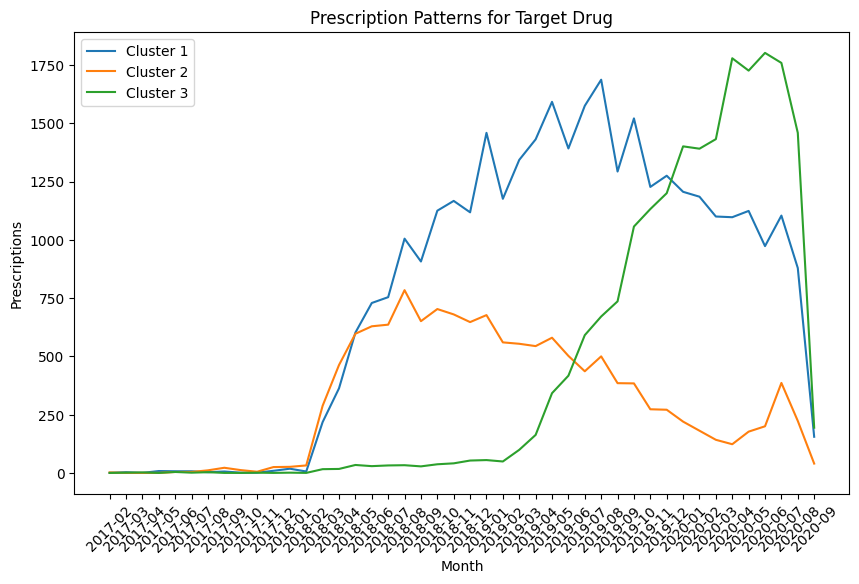

In [21]:
# to do visualization we need to plot the precription patterns fpr each cluster
plt.figure(figsize=(10, 6))
for cluster_id in range(len(np.unique(cluster_labels))):
    cluster_data = feature_matrix[cluster_labels == cluster_id]
    prescription_counts = cluster_data.sum()
    plt.plot(prescription_counts.index, prescription_counts.values, label=f'Cluster {cluster_id + 1}')
    
plt.xlabel('Month')
plt.ylabel('Prescriptions')
plt.legend()
plt.title('Prescription Patterns for Target Drug')
plt.xticks(rotation=45)
plt.show()